# Обучение с учителем (Supervised Learning)

## 1. Введение

В задаче регрессии мы используем входные признаки, чтобы предсказать целевые значения. Например, чтобы предсказать цену квартиры на основании площади квартиры.
Предположим, у нас есть набор точек ${(x_i, y_i)}$:

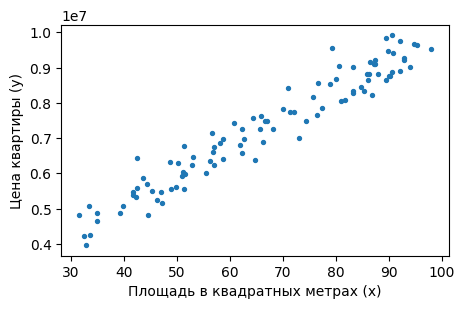

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(21)
x = 30 + 70 * np.random.rand(100, 1)
y = 2_000_000 + 80_000 * x + np.random.randn(100, 1) * 400_000

plt.figure(figsize=(5, 3))
plt.scatter(x, y, s=8)
plt.xlabel("Площадь в квадратных метрах (x)")
plt.ylabel("Цена квартиры (y)")
plt.show()

Цель линейной регрессии – поиск функции $y=wx+b$, линия которой наилучшим образом соответствует заданным точкам.

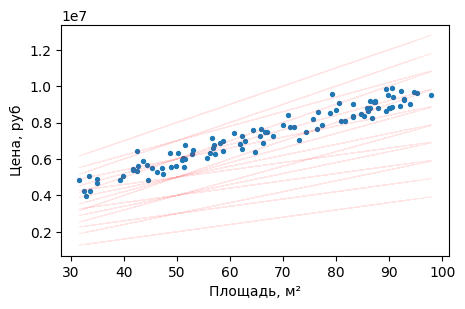

In [ ]:
np.random.seed(21)
x = 30 + 70 * np.random.rand(100, 1)
y = 2_000_000 + 80_000 * x + np.random.randn(100, 1) * 400_000

plt.figure(figsize=(5, 3))
plt.scatter(x, y, s=8)

for w in np.arange(40_000, 120_000, 20_000):
    for b in np.arange(0, 4_000_000, 1_000_000):
        y_pred = b + w * x
        plt.plot(x, y_pred, color="r", alpha=0.1, linewidth=0.5)

plt.xlabel("Площадь, м²")
plt.ylabel("Цена, руб")
plt.show()

Метод перебора параметров наклона и сдвига $w$ и $b$ показывает, что таких линий невероятно много. Модель $\hat{y}=wx+b$ ($y$ в домике будем использовать для обозначения предсказанной фукнции) задает параметрическое семейство функций, поэтому нашей модели линейной регрессии нужно выбрать "правильного" представителя из этого семейства – это и есть обучение.

Но как выбрать параметры? Как понять, что линия – та самая?? 
**Функция потерь** позволяет вычислить меру количества ошибок. Для задачи регрессии такой мерой может быть **расстояние между предсказанным значеним $y$ и его фактическим значением**. Распространенной фукнцией потерь является средняя квадратичная ошибка (MSE): $$Loss=MSE=\frac{1}{n}\sum_{i=1}^{n}(y_i-(wx_i+b))^2$$
Чем меньше MSE тем предсказание лучше. Тогда наша задача **поиска оптимальных параметров** модели сводится к задаче **поиска минимума функции потерь**.

Задача на поиск локального минимума:
$MSE$ – квадратичная функция (относительно переменных $w$ и $b$), а так же выпуклая. 

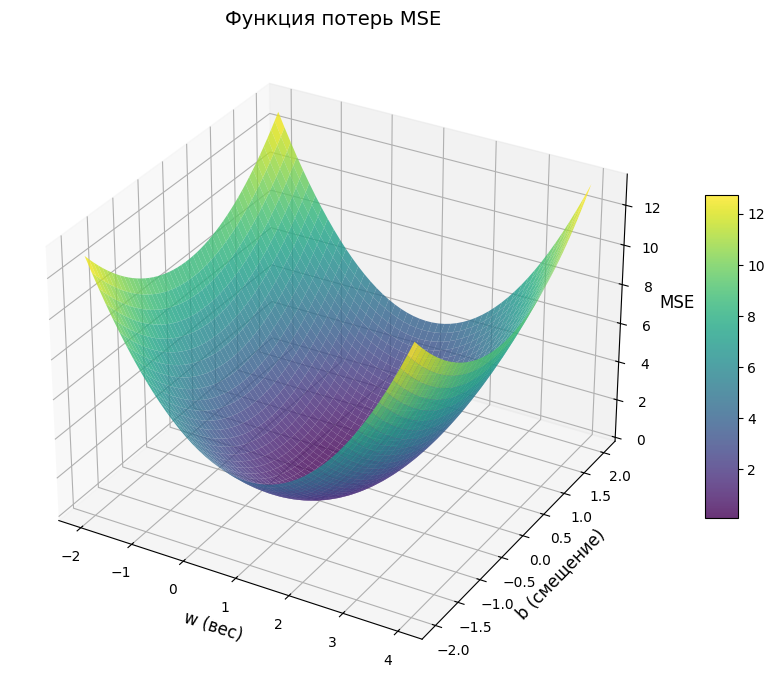

In [ ]:
np.random.seed(21)

x_norm = (x - x.mean()) / x.std()
y_norm = (y - y.mean()) / y.std()

w_vals = np.linspace(-2, 4, 50)
b_vals = np.linspace(-2, 2, 50)
W, B = np.meshgrid(w_vals, b_vals)

MSE = np.zeros_like(W)
for i in range(len(w_vals)):
    for j in range(len(b_vals)):
        y_pred = B[j, i] + W[j, i] * x_norm
        MSE[j, i] = np.mean((y_norm - y_pred) ** 2)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(W, B, MSE, cmap='viridis', alpha=0.8)

ax.set_xlabel('w (вес)', fontsize=12)
ax.set_ylabel('b (смещение)', fontsize=12)
ax.set_zlabel('MSE', fontsize=12)
ax.set_title('Функция потерь MSE', fontsize=14)

fig.colorbar(surf, shrink=0.5, aspect=10)
plt.tight_layout()
plt.show()

Чаша/параболоид.
Есть необходимое условие локального минимума дифференцируемой функции: $$\begin{cases} \frac{\partial \text{Loss}}{\partial w} = 0, \\ \frac{\partial \text{Loss}}{\partial b} = 0. \end{cases}$$

А тк у нас квадратическая функция, значит существует только одна точка, где производные равны нулю. Получается, что нам нужно лишь продифференцировать MSE и найти точку в которой производные равны нулю.

### a) Вывод аналитического решения задачи регрессии

Для поиска аналитического решения нужно **взять производные по параметрам и решить уравнения напрямую**.
Используем векторную формулу уравенения (по условию), для того, чтобы было удобнее работать с формулой, ведь выражение MSE в виде суммы неудобно считать, брать производные и т.д.

В $\hat{y}=wx+b$ у нас две неизвестные переменные $w$ и $b$, для удобства объединим в вектор параметров $\theta=\begin{pmatrix} b \\ w \end{pmatrix}$, а чтобы представить $X$ как вектор-столбец, добавим фиктивный столбец в матрицу иксов: $X=\begin{pmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_i \end{pmatrix}$. Предсказания модели для всех объектов сразу: $\hat{Y}=X\theta$

Пусть $Y$ – вектор истинных ответов:
$Y = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_i \end{pmatrix}$

Тогда вектор ошибок будет выглядеть следующим образом: $\mathbf{e} = Y-\hat{Y}=Y-X\theta = \begin{pmatrix} y_1 - \hat{y}_1 \\ y_2 - \hat{y}_2 \\ \vdots \\ y_n - \hat{y}_n \end{pmatrix}$. Каждый элемент – ошибка на одном объекте.

$\lVert \mathbf{e} \rVert^2=e^\top e=(Y-X\theta)^\top (Y-X\theta)$ - сумма квадратов ошибок

Обозначим квадратичную функцию потерь: $L(X, Y, \theta)=(Y-X\theta)^\top (Y-X\theta)$ (опустили факт наличия $1/N$, т.к. это просто положительаня константа, которая не меняет минимум)

Чтобы найти оптимальное решение, приравняем к нулю производную приведенного выше уравнения:
$$\nabla_\theta L(\theta)=\nabla_\theta[Y^\top Y-XY^\top \theta-X^\top Y\theta^\top + X^\top \theta^\top X\theta]=0$$
Дифференцируем:
1) $\nabla_\theta (Y^\top Y)=0$
2) $\nabla_\theta (-XY^\top \theta)=-X^\top Y$
3) $\nabla_\theta (-X^\top Y\theta^\top)=-X^\top Y$
4) $\nabla_\theta (X^\top \theta^\top X\theta)=2X^\top X\theta$

Итого:
$$\nabla_\theta L(\theta)=0-X^\top Y-X^\top Y+2X^\top X\theta$$
$$2X^\top X\theta-2X^\top Y=0$$

$\theta$ в точке глобального минимума: $$\theta=(X^\top X)^{-1}X^\top Y$$

С виду все отлично, но стоит понимать, что у аналитичесокго решения есть следующая проблема: решение может не существовать, если 
- признаки линейно зависимы
- проблема высокой размерности: признаков больше, чем объектов
- есть дубликаты признаков или сильная корреляция

Получается, что наша матрица является вырожденной.
А поскольку $X^{\top }X^{-1}$ не существует, мы не можем использовать классическую формулу нормального уравнения МНК для поиска весов.

Решение проблемы данной проблемы состоит в регуляризации линейной модели. 

### b) Изменение в аналитическом решении при добавлении L1 и L2 регуляризации к функции потерь

Существуют разные способы регуляризации, но самый популярный - добавление регуляризующего слагаемого в минимизируемую функцию потерь:Типы L1 и L2 – наиболее распространенные. Отличаются же только способом наложения штрафа:
$$Q(\theta)=\frac{1}{n}\sum_{i=1}^{n}(Y-X\theta)^2+\lambda R(\theta)\rightarrow min_w$$
В данной записи фукнция $R(\theta)$ – регуляризатор, который штрафует параметры модели за излишнюю сложность

#### L1 регуляризация (Lasso)

В качестве регуляризатора используется L1-норма вектора параметров:
$$R(\theta)=\lVert \mathbf{\theta} \rVert_1 = |\theta_1|+...+|\theta_n|$$
Итого: $$Q(\theta)=\lVert \mathbf{Y-X\theta} \rVert^2_2 + \lambda \lVert \mathbf{\theta} \rVert_1$$

Она основана на добавлении штрафа, равного абсолютному значению коэффициентов модели. Это приводит к отбору признаков - модель полностью перестаёт учитывать признаки, при которых получились нулевые веса!

#### L2 регуляризация (Ridge)

В случае L2-регуляризации регуляризатор выбирается в виде квадрата L2-нормы параметров: $$R(\theta)=\lVert \mathbf{\theta} \rVert^2_2=\theta^2_1+...+\theta^2_n$$

Итого:
$$Q(\theta)=\lVert \mathbf{Y-X\theta} \rVert^2_2 + \lambda \lVert \mathbf{\theta} \rVert^2_2$$

В L2-регуляризации штраф квадратично возрастает при увеличении веса. Это приводит к более равномерному распределению весов по признакам, что способствует более полному учёту их значений.

### c) Объясните, почему L1-регуляризация часто используется для отбора признаков. Почему после обучения модели остается много весов, равных нулю?

При использовании L1-регуляризации регуляризационный член линейно увеличивает штраф за каждый ненулевой параметр модели. И тк штраф не уменьшается квадратично, как в L2-регуляризации, а остаётся существенным даже для малых значений коэффициентов, обучение часто приводит к точному занулению весов.

В результате модель становится разреженной: признаки с нулевыми коэффициентами исключаются, а оставшиеся признаки оказываются наиболее значимыми для предсказания. L1-регуляризация часто используется для отбора признаков, потому что она приводит к разреженным решениям, в которых слабые признаки получают нулевые веса, полностью исключаясь из модели.

### d) Объясните, как можно использовать те же модели (линейная регрессия, гребневая регрессия и т. д.), но при этом обеспечить возможность учета нелинейных зависимостей.?

Можно использовать линейные модели для нелинейных зависимостей через преобразование признаков: создаём новые признаки как функции исходных (полиномиальные, экспоненты, синусы, сплайны и т.д.) и обучаем модель на них. Модель остаётся линейной по коэффициентам, но функция от исходных переменных становится нелинейной.

## 2. Предварительная обработка данных

In [ ]:
import re
from collections import Counter

import pandas as pd

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler as sklearn_MinMaxScaler, StandardScaler as sklearn_StandardScaler
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso,
    ElasticNet
)

Подгружаем данные. Из прошлого проекта знаем, что в данных есть выбросы – удалим их. 

In [ ]:
train_df = pd.read_json('./data/train.json')
test_df = pd.read_json('./data/test.json')

In [ ]:
percentile_99 = np.percentile(train_df['price'], 99)
percentile_1 = np.percentile(train_df['price'], 1)
train_df = train_df[(percentile_1 < train_df['price']) & (train_df['price'] < percentile_99) & (train_df['bathrooms'] <= 10)]

percentile_99 = np.percentile(test_df['price'], 99)
percentile_1 = np.percentile(test_df['price'], 1)
test_df = test_df[(percentile_1 < test_df['price']) & (test_df['price'] < percentile_99) & (test_df['bathrooms'] <= 10)]

Очищаем список текстовых признаков от лишних символов => приводим их к единому виду. Отбираем наиболее часто встречающиеся признаки и преобразуем их в бинарные (1 - есть в объявлении, 0 - нет). Формируем финальные обучающую и тестовую выборки с числовыми признаками и целевой переменной цены

In [ ]:

pattern = r"[\[\]'\" ]"

train_df['features'] = train_df['features'].apply(lambda ftrs: [re.sub(pattern, '', f) for f in ftrs])
test_df['features'] = test_df['features'].apply(lambda ftrs: [re.sub(pattern, '', f) for f in ftrs])

In [ ]:
features = [ff for f in train_df['features'] for ff in f]

counter = Counter(features)
len(counter)


1529

In [ ]:
features = [(feat, count) for feat, count in counter.most_common(20)]
display('Список самых популярных функций (топ 20)')
display(features)

'Список самых популярных функций (топ 20)'

[('Elevator', 25375),
 ('HardwoodFloors', 23146),
 ('CatsAllowed', 23135),
 ('DogsAllowed', 21652),
 ('Doorman', 20479),
 ('Dishwasher', 20081),
 ('NoFee', 17793),
 ('LaundryinBuilding', 16082),
 ('FitnessCenter', 12989),
 ('Pre-War', 8971),
 ('LaundryinUnit', 8437),
 ('RoofDeck', 6417),
 ('OutdoorSpace', 5132),
 ('DiningRoom', 4890),
 ('HighSpeedInternet', 4223),
 ('Balcony', 2898),
 ('SwimmingPool', 2643),
 ('LaundryInBuilding', 2564),
 ('NewConstruction', 2504),
 ('Terrace', 2177)]

In [ ]:
for feat, count in features:
    train_df[feat] = train_df['features'].apply(lambda feats: int(feat in feats))
    test_df[feat] = test_df['features'].apply(lambda feats: int(feat in feats))
feature_list = [i[0] for i in features] + ['bathrooms', 'bedrooms'] 

In [ ]:
X_train, y_train = train_df[feature_list], train_df['price']
X_test, y_test   = test_df[feature_list],  test_df['price']

display(X_train.head(3))

,Elevator,HardwoodFloors,CatsAllowed,DogsAllowed,Doorman,Dishwasher,NoFee,LaundryinBuilding,FitnessCenter,Pre-War,...,OutdoorSpace,DiningRoom,HighSpeedInternet,Balcony,SwimmingPool,LaundryInBuilding,NewConstruction,Terrace,bathrooms,bedrooms
4,0,1,1,1,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,1.0,1
6,1,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1.0,2
9,1,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1.0,2


## 3. Реализация моделей линейной регрессии

Реализовали классы линейной регрессии с двумя основными методами — fit и predict. Основной класс построен на стохастическом градиентном спуске (SGD). Для лучшего понимания реализовала отдельные версии алгоритма с аналитическим решением и нестохастическим градиентным спуском.

In [ ]:
class BaseLinearRegression:
    def __init__(self):
        self.w = None
        self.b = None

    def predict(self, X):
        return X @ self.w + self.b

    def fit(self, X, y):
        pass

In [ ]:
class LinearRegressionAnalytical(BaseLinearRegression):
    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)

        n_samples = X.shape[0]
        X = np.hstack([np.ones((n_samples, 1)), X])
        theta = np.linalg.pinv(X) @ y

        self.b = theta[0]
        self.w = theta[1:]

Реализуем линейную регрессию, обучаемую градиентным спуском

In [ ]:
class LinearRegressionGD(BaseLinearRegression):
    def __init__(self, lr=0.01, n_iter=1000):
        super().__init__()
        self.lr = lr
        self.n_iter = n_iter

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0.0

        for _ in range(self.n_iter):
            y_pred = X @ self.w + self.b
            dw = 2 * X.T @ (y_pred - y) / n_samples
            db = 2 * np.mean(y_pred - y)
            self.w -= self.lr * dw
            self.b -= self.lr * db


Реализуем стохастический градиентный спуск (SGD) для линейной регрессии, чтобы сделать обучение быстрее по сравнению с использованием всей выборки (будем брать частями)

In [ ]:
class LinearRegressionSGD(BaseLinearRegression):
    def __init__(self, lr=0.01, n_iter=1000, batch_size=32, shuffle=True, random_state=None):
        super().__init__()
        self.lr = lr
        self.n_iter = n_iter
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        n_samples, n_features = X.shape
        rng = np.random.default_rng(self.random_state)

        self.w = np.zeros(n_features)
        self.b = 0.0

        for _ in range(self.n_iter):
            indices = np.arange(n_samples)
            if self.shuffle:
                rng.shuffle(indices)

            for start in range(0, n_samples, self.batch_size):
                batch_idx = indices[start:start + self.batch_size]
                X_batch = X[batch_idx]
                y_batch = y[batch_idx]

                error = self.predict(X_batch) - y_batch

                dw = 2 * X_batch.T @ error / len(y_batch)
                db = 2 * error.mean()

                self.w -= self.lr * dw
                self.b -= self.lr * db


Реализуем коэффициент $R^2$

Коэффициент детерминации R² показывает, какую долю вариации целевой переменной объясняет модель

In [ ]:
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - ss_res / ss_tot


Прогнозирование с помощью собственных классов линейной регрессии (метрики MAE, RMSE и $R^2$)

In [ ]:
def evaluate_models(models, X_train, y_train, X_test, y_test):
    rows = []
    for name, model in models.items():
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        rows.append({
            "model": name,
            "train_MAE": mean_absolute_error(y_train, y_train_pred),
            "test_MAE": mean_absolute_error(y_test, y_test_pred),
            "train_RMSE": root_mean_squared_error(y_train, y_train_pred),
            "test_RMSE": root_mean_squared_error(y_test, y_test_pred),
            "train_R2": r2_score(y_train, y_train_pred),
            "test_R2": r2_score(y_test, y_test_pred),
        })

    return pd.DataFrame(rows)

In [ ]:
models = {
    "Analytical": LinearRegressionAnalytical(),
    "GD": LinearRegressionGD(lr=0.05, n_iter=500),
    "SGD": LinearRegressionSGD(lr=0.001, n_iter=100, batch_size=32, random_state=21),
    "Sklearn_LR": LinearRegression()
}

In [ ]:
results = evaluate_models(models, X_train.values, y_train.values, X_test.values, y_test.values)


mae_table = results[["model", "train_MAE", "test_MAE"]]

rmse_table = results[["model", "train_RMSE", "test_RMSE"]]

r2_table = results[["model", "train_R2", "test_R2"]]

In [ ]:
def display_tables():
    display('Метрика R2:')
    display(r2_table)
    display('Метрика MAE')
    display(mae_table)
    display('Метрика RMSE')
    display(rmse_table)

In [ ]:
display_tables()

'Метрика R2:'

,model,train_R2,test_R2
0,Analytical,0.580269,0.578662
1,GD,0.580168,0.578570
2,SGD,0.580247,0.578639
3,Sklearn_LR,0.580269,0.578662


'Метрика MAE'

,model,train_MAE,test_MAE
0,Analytical,708.737118,709.726085
1,GD,708.686129,709.731431
2,SGD,707.754764,708.783357
3,Sklearn_LR,708.737118,709.726085


'Метрика RMSE'

,model,train_RMSE,test_RMSE
0,Analytical,1027.262879,1021.194868
1,GD,1027.385996,1021.307219
2,SGD,1027.290399,1021.223445
3,Sklearn_LR,1027.262879,1021.194868


Все реализации линейной регрессии (аналитическая, GD, SGD и sklearn) выдают +- одинаковый результат

## 4. Реализация моделей с регуляризацией — Ridge, Lasso, ElasticNet

Реализуем алгоритмы Ridge, Lasso и ElasticNet, а после попробуем расширить функцию потерь с помощью L2, L1 и обеих регуляризаций соответственно

In [ ]:
class RidgeSGD(LinearRegressionSGD):
    def __init__(self, lr=0.01, n_iter=1000, batch_size=32, alpha=1.0, shuffle=True, random_state=None):
        super().__init__(lr, n_iter, batch_size, shuffle, random_state)
        self.alpha = alpha

    def fit(self, X, y):
        n_samples, n_features = X.shape

        rng = np.random.default_rng(self.random_state)
        self.w = np.zeros(n_features)
        self.b = 0.0

        for _ in range(self.n_iter):
            indices = np.arange(n_samples)
            if self.shuffle:
                rng.shuffle(indices)

            for start in range(0, n_samples, self.batch_size):
                batch_idx = indices[start:start + self.batch_size]
                X_batch = X[batch_idx]
                y_batch = y[batch_idx]

                error = self.predict(X_batch) - y_batch
                m = len(y_batch)

                dw = 2 * X_batch.T @ error / m
                db = 2 * error.mean()

                dw += 2 * self.alpha * self.w

                self.w -= self.lr * dw
                self.b -= self.lr * db


In [ ]:
class LassoSGD(LinearRegressionSGD):
    def __init__(self, lr=0.01, n_iter=1000, batch_size=32, alpha=1.0, shuffle=True, random_state=None):
        super().__init__(lr, n_iter, batch_size, shuffle, random_state)
        self.alpha = alpha

    def fit(self, X, y):
        n_samples, n_features = X.shape
        rng = np.random.default_rng(self.random_state)

        self.w = np.zeros(n_features)
        self.b = 0.0

        for _ in range(self.n_iter):
            indices = np.arange(n_samples)
            if self.shuffle:
                rng.shuffle(indices)

            for start in range(0, n_samples, self.batch_size):
                batch_idx = indices[start:start + self.batch_size]
                X_batch = X[batch_idx]
                y_batch = y[batch_idx]

                y_pred = X_batch @ self.w + self.b
                error = y_pred - y_batch

                dw = (X_batch.T @ error) / len(y_batch) + self.alpha * np.sign(self.w)
                db = error.mean()

                self.w -= self.lr * dw
                self.b -= self.lr * db


In [ ]:
class ElasticNetSGD(LinearRegressionSGD):
    def __init__(self, lr=0.01, n_iter=1000, batch_size=32, alpha=1.0, l1_ratio=0.5, shuffle=True, random_state=None):
        super().__init__(lr, n_iter, batch_size, shuffle, random_state)
        self.alpha = alpha
        self.l1_ratio = l1_ratio

    def fit(self, X, y):
        n_samples, n_features = X.shape

        rng = np.random.default_rng(self.random_state)
        self.w = np.zeros(n_features)
        self.b = 0.0

        for _ in range(self.n_iter):
            indices = np.arange(n_samples)
            if self.shuffle:
                rng.shuffle(indices)

            for start in range(0, n_samples, self.batch_size):
                batch_idx = indices[start:start+self.batch_size]
                X_batch, y_batch = X[batch_idx], y[batch_idx]

                error = X_batch @ self.w + self.b - y_batch

                dw = 2 * X_batch.T @ error / len(y_batch)
                dw += self.alpha * (self.l1_ratio * np.sign(self.w) + (1 - self.l1_ratio) * 2 * self.w)
                db = 2 * np.mean(error)

                self.w -= self.lr * dw
                self.b -= self.lr * db


In [ ]:
regularized_models = {
    "Ridge_SGD": RidgeSGD(lr=0.005, n_iter=50, alpha=0.1),
    "Ridge_sklearn": Ridge(alpha=1.0),
    "Lasso_SGD": LassoSGD(lr=0.005, n_iter=50, alpha=1.0),
    "Lasso_sklearn": Lasso(alpha=1.0),
    "ElasticNet_SGD": ElasticNetSGD(lr=0.0001, n_iter=30, alpha=1, l1_ratio=0.5),
    "ElasticNet_sklearn": ElasticNet(alpha=1.0, l1_ratio=0.5)
}


In [ ]:
results = evaluate_models(
    regularized_models,
    X_train.values, y_train.values,
    X_test.values, y_test.values
)

mae_table = pd.concat([mae_table, results[["model", "train_MAE", "test_MAE"]]], ignore_index=True)
rmse_table = pd.concat([rmse_table, results[["model", "train_RMSE", "test_RMSE"]]], ignore_index=True)
r2_table = pd.concat([r2_table, results[["model", "train_R2", "test_R2"]]], ignore_index=True)


In [ ]:
display_tables()

'Метрика R2:'

,model,train_R2,test_R2
0,Analytical,0.580269,0.578662
1,GD,0.580168,0.578570
2,SGD,0.580247,0.578639
3,Sklearn_LR,0.580269,0.578662
4,Ridge_SGD,0.549921,0.547757
5,Ridge_sklearn,0.580269,0.578662
6,Lasso_SGD,0.579804,0.578477
7,Lasso_sklearn,0.580112,0.578623
8,ElasticNet_SGD,0.470798,0.468273
9,ElasticNet_sklearn,0.445892,0.443202


'Метрика MAE'

,model,train_MAE,test_MAE
0,Analytical,708.737118,709.726085
1,GD,708.686129,709.731431
2,SGD,707.754764,708.783357
3,Sklearn_LR,708.737118,709.726085
4,Ridge_SGD,720.443341,720.902040
5,Ridge_sklearn,708.734175,709.722774
6,Lasso_SGD,705.533854,706.539603
7,Lasso_sklearn,708.383322,709.350441
8,ElasticNet_SGD,775.163209,775.554259
9,ElasticNet_sklearn,804.298273,804.655592


'Метрика RMSE'

,model,train_RMSE,test_RMSE
0,Analytical,1027.262879,1021.194868
1,GD,1027.385996,1021.307219
2,SGD,1027.290399,1021.223445
3,Sklearn_LR,1027.262879,1021.194868
4,Ridge_SGD,1063.751965,1057.984940
5,Ridge_sklearn,1027.262884,1021.195080
6,Lasso_SGD,1027.831493,1021.419013
7,Lasso_sklearn,1027.454730,1021.242224
8,ElasticNet_SGD,1153.471941,1147.196688
9,ElasticNet_sklearn,1180.302091,1173.930739


Среди моделей с регуляризацией лучшую качество показала `Lasso`, так как её результаты наиболее близки к соответствующим значениям у реализации sklearn и почти не уступают обычной линейной регрессии

## 5. Нормализация признаков

Нормализация признаков - это приведение разных признаков к одной шкале (обычно [0, 1] или со средним 0 и стандартным отклонением 1). Она нужна не всегда, но есть ситуации, когда без неё обучение модели сильно страдает. Примеры:

Когда нужна:
1) **Методы градиентного спуска (Linear/GD/SGD и остальные)**:
Если один признак имеет диапазон [0, 1], а другой [0, 1000], градиент по большому признаку будет сильно доминировать. Алгоритм будет «скакать» и медленно сходиться.

2) **Методы на основе расстояний (k-NN, K-Means и тд):**
Алгоритмы сравнивают признаки через евклидово расстояние. Если один признак в тысячах, а другой — в единицах, первый полностью определяет расстояние

3) **Регуляризация:**
Регуляризаторы штрафуют веса по абсолютной величине или квадрату. Если признаки не нормализованы, штрафы применяются неравномерно.

Когда не нужна:
1) **Деревья решений (DecisionTree, RandomForest, GradientBoosting):** Деревья используют пороги для разбиений, им не важно, в каких единицах признаки.

### MinMaxScaler

MinMaxScaler приводит данные к заданному диапазону (по умолчанию к промежутку от 0 до 1).
$$x'=\frac{x-x_{min}}{x_{max}-x_{min}}$$

Для произвольного диапазона $[a, b]$: $$x'=a+\frac{(x-x_{min})(b-a)}{x_{max}-x_{min}}$$

In [ ]:
class MinMaxScaler:
    def fit(self, X):
        self.min_ = X.min(axis=0)
        self.max_ = X.max(axis=0)
        return self
    
    def transform(self, X):
        return (X - self.min_) / (self.max_ - self.min_)
    
    def fit_transform(self, X):
        return self.fit(X).transform(X)


In [ ]:
scaler_skl = sklearn_MinMaxScaler()
X_scaled_skl = scaler_skl.fit_transform(X_train)
scaler_my = MinMaxScaler()
X_scaled_my = scaler_my.fit_transform(X_train)

X_scaled_my == X_scaled_skl

True

### StandardScaler

Данный метод нормализации реализует Z‑преобразование (стандартизацию), при котором каждому признаку задаются нулевое среднее и единичная дисперсия с помощью преобразования вида:
$$x'=\frac{x-\mu}{\sigma}$$
где мю – среднее значение, сигма - стандартное отклонение принака

In [ ]:
class StandardScaler:
    def fit(self, X):
        X = np.asarray(X, dtype=float)
        self.mean_ = X.mean(axis=0)
        self.std_ = X.std(axis=0)
        self.std_[self.std_ == 0] = 1.0
        return self

    def transform(self, X):
        X = np.asarray(X, dtype=float)
        return (X - self.mean_) / self.std_

    def fit_transform(self, X):
        return self.fit(X).transform(X)

In [ ]:
scaler_skl = sklearn_StandardScaler()
X_scaled_skl = scaler_skl.fit_transform(X_train)

scaler_my = StandardScaler()
X_scaled_my = scaler_my.fit_transform(X_train)

np.allclose(X_scaled_my, X_scaled_skl)


True

## 6. Обучение пользовательских моделей и модели sklearn на нормализованных данных

In [ ]:
scalers = {
    "MinMax": MinMaxScaler(),
    "Standard": StandardScaler()
}

models_minmax = {
    "SGD": LinearRegressionSGD(lr=0.005, n_iter=500, batch_size=32, random_state=21),
    "Ridge_SGD": RidgeSGD(lr=0.005, n_iter=300, alpha=0.001),
    "sclearn_Ridge": Ridge(alpha=0.001),
    "Lasso_SGD": LassoSGD(lr=0.001, n_iter=500, alpha=0.01),
    "sclearn_Lasso": Lasso(alpha=0.1),
    "ElasticNet_SGD": ElasticNetSGD(lr=0.0005, n_iter=500, alpha=0.001, l1_ratio=0.7, batch_size=128),
    'sclearn_ElasticNet': ElasticNet(alpha=0.001, l1_ratio=0.7)
}
models_standard = {
    "SGD": LinearRegressionSGD(lr=0.001, n_iter=200, batch_size=32, random_state=21),
    "Ridge_SGD": RidgeSGD(lr=0.001, n_iter=500, alpha=0.01),
    "sclearn_Ridge": Ridge(alpha=1, max_iter=1000),
    "Lasso_SGD": LassoSGD(lr=0.0005, n_iter=500, alpha=1.0),
    "sclearn_Lasso": Lasso(alpha=0.1, max_iter=2000),
    "ElasticNet_SGD": ElasticNetSGD(lr=0.0005, n_iter=3000, alpha=0.1, l1_ratio=0.7),
    'sclearn_ElasticNet': ElasticNet(max_iter=2000, alpha=0.1, l1_ratio=0.7)
}

In [ ]:
def evaluate_models_scaler(models: dict, scaler, scaler_name: str, X_train, y_train, X_test, y_test,
                    mae_table, rmse_table, r2_table):
    X_train = np.asarray(X_train)
    X_test = np.asarray(X_test)
    y_train = np.asarray(y_train)
    y_test = np.asarray(y_test)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    results = evaluate_models(models, X_train_scaled, y_train, X_test_scaled, y_test)
    
    mae_append = results[["model", "train_MAE", "test_MAE"]].copy()
    mae_append["scaler"] = scaler_name
    rmse_append = results[["model", "train_RMSE", "test_RMSE"]].copy()
    rmse_append["scaler"] = scaler_name
    r2_append = results[["model", "train_R2", "test_R2"]].copy()
    r2_append["scaler"] = scaler_name

    mae_table = pd.concat([mae_table, mae_append], ignore_index=True)
    rmse_table = pd.concat([rmse_table, rmse_append], ignore_index=True)
    r2_table = pd.concat([r2_table, r2_append], ignore_index=True)

    return mae_table, rmse_table, r2_table


In [ ]:
mae_table, rmse_table, r2_table = evaluate_models_scaler(
    models_minmax, MinMaxScaler(), "MinMax",
    X_train, y_train, X_test, y_test,
    mae_table, rmse_table, r2_table
)

mae_table, rmse_table, r2_table = evaluate_models_scaler(
    models_standard, StandardScaler(), "Standard",
    X_train, y_train, X_test, y_test,
    mae_table, rmse_table, r2_table
)

In [ ]:
display_tables()

'Метрика R2:'

,model,train_R2,test_R2,scaler
0,Analytical,0.580269,0.578662,NaN
1,GD,0.580168,0.578570,NaN
2,SGD,0.580247,0.578639,NaN
3,Sklearn_LR,0.580269,0.578662,NaN
4,Ridge_SGD,0.549921,0.547757,NaN
5,Ridge_sklearn,0.580269,0.578662,NaN
6,Lasso_SGD,0.579804,0.578477,NaN
7,Lasso_sklearn,0.580112,0.578623,NaN
8,ElasticNet_SGD,0.470798,0.468273,NaN
9,ElasticNet_sklearn,0.445892,0.443202,NaN


'Метрика MAE'

,model,train_MAE,test_MAE,scaler
0,Analytical,708.737118,709.726085,NaN
1,GD,708.686129,709.731431,NaN
2,SGD,707.754764,708.783357,NaN
3,Sklearn_LR,708.737118,709.726085,NaN
4,Ridge_SGD,720.443341,720.902040,NaN
5,Ridge_sklearn,708.734175,709.722774,NaN
6,Lasso_SGD,705.533854,706.539603,NaN
7,Lasso_sklearn,708.383322,709.350441,NaN
8,ElasticNet_SGD,775.163209,775.554259,NaN
9,ElasticNet_sklearn,804.298273,804.655592,NaN


'Метрика RMSE'

,model,train_RMSE,test_RMSE,scaler
0,Analytical,1027.262879,1021.194868,NaN
1,GD,1027.385996,1021.307219,NaN
2,SGD,1027.290399,1021.223445,NaN
3,Sklearn_LR,1027.262879,1021.194868,NaN
4,Ridge_SGD,1063.751965,1057.984940,NaN
5,Ridge_sklearn,1027.262884,1021.195080,NaN
6,Lasso_SGD,1027.831493,1021.419013,NaN
7,Lasso_sklearn,1027.454730,1021.242224,NaN
8,ElasticNet_SGD,1153.471941,1147.196688,NaN
9,ElasticNet_sklearn,1180.302091,1173.930739,NaN


Реализация `Lasso_SGD` при использовании нормализации работает наиболее эффективно и корректно, выдавая результат +- на уровне библиотечных аналогов

## 7. Обучение пользовательских моделей с избыточной подготовкой

In [ ]:
poly = PolynomialFeatures(degree=10, include_bias=True)

X_train_poly = poly.fit_transform(X_train[['bathrooms', 'bedrooms']])
X_test_poly = poly.transform(X_test[['bathrooms', 'bedrooms']])
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)


In [ ]:
models_poly = {
    "Linear_SGD_Poly": LinearRegressionSGD(lr=5e-5, n_iter=1000, batch_size=64),
    "Ridge_SGD_Poly": RidgeSGD(lr=5e-5, n_iter=500, alpha=10.0),
    "Lasso_SGD_Poly": LassoSGD(lr=1e-5, n_iter=1000, alpha=0.1),
    "ElasticNet_SGD_Poly": ElasticNetSGD(lr=1e-5, n_iter=1000, alpha=1.0, l1_ratio=0.8),
}

mae_table, rmse_table, r2_table = evaluate_models_scaler(
    models_poly,
    scaler,
    "Poly10+StdX",
    X_train_poly, y_train,
    X_test_poly, y_test,
    mae_table, rmse_table, r2_table
)

In [ ]:
display_tables()

'Метрика R2:'

,model,train_R2,test_R2,scaler
0,Analytical,0.580269,0.578662,NaN
1,GD,0.580168,0.578570,NaN
2,SGD,0.580247,0.578639,NaN
3,Sklearn_LR,0.580269,0.578662,NaN
4,Ridge_SGD,0.549921,0.547757,NaN
5,Ridge_sklearn,0.580269,0.578662,NaN
6,Lasso_SGD,0.579804,0.578477,NaN
7,Lasso_sklearn,0.580112,0.578623,NaN
8,ElasticNet_SGD,0.470798,0.468273,NaN
9,ElasticNet_sklearn,0.445892,0.443202,NaN


'Метрика MAE'

,model,train_MAE,test_MAE,scaler
0,Analytical,708.737118,709.726085,NaN
1,GD,708.686129,709.731431,NaN
2,SGD,707.754764,708.783357,NaN
3,Sklearn_LR,708.737118,709.726085,NaN
4,Ridge_SGD,720.443341,720.902040,NaN
5,Ridge_sklearn,708.734175,709.722774,NaN
6,Lasso_SGD,705.533854,706.539603,NaN
7,Lasso_sklearn,708.383322,709.350441,NaN
8,ElasticNet_SGD,775.163209,775.554259,NaN
9,ElasticNet_sklearn,804.298273,804.655592,NaN


'Метрика RMSE'

,model,train_RMSE,test_RMSE,scaler
0,Analytical,1027.262879,1021.194868,NaN
1,GD,1027.385996,1021.307219,NaN
2,SGD,1027.290399,1021.223445,NaN
3,Sklearn_LR,1027.262879,1021.194868,NaN
4,Ridge_SGD,1063.751965,1057.984940,NaN
5,Ridge_sklearn,1027.262884,1021.195080,NaN
6,Lasso_SGD,1027.831493,1021.419013,NaN
7,Lasso_sklearn,1027.454730,1021.242224,NaN
8,ElasticNet_SGD,1153.471941,1147.196688,NaN
9,ElasticNet_sklearn,1180.302091,1173.930739,NaN


Вывод: Полином не даёт прироста. Если подобрать хорошие параметры для моделей можно добиться примерно такого же результата как и без полинома. Но смысла в нем в данной задаче нет. 

Lasso_SGD_Poly не переобучается, сохраняет качество, корректно демонстрирует небольшую пользу регуляризации с избыточной подготовкой. Но добиться такого значения было тяжело

## 8. Наивные модели

In [ ]:
natives = {
    "mean": np.mean(y_train),
    "median": np.median(y_train),
}

for name, value in natives.items():
    y_train_pred = np.full_like(y_train, value, dtype=float)
    y_test_pred  = np.full_like(y_test, value, dtype=float)

    mae_table.loc[len(mae_table)] = {
        "model": name,
        "train_MAE": mean_absolute_error(y_train, y_train_pred),
        "test_MAE": mean_absolute_error(y_test, y_test_pred),
        "scaler": np.nan,
    }

    rmse_table.loc[len(rmse_table)] = {
        "model": name,
        "train_RMSE": root_mean_squared_error(y_train, y_train_pred),
        "test_RMSE": root_mean_squared_error(y_test, y_test_pred),
        "scaler": np.nan,
    }

    r2_table.loc[len(r2_table)] = {
        "model": name,
        "train_R2": r2_score(y_train, y_train_pred),
        "test_R2": r2_score(y_test, y_test_pred),
        "scaler": np.nan,
    }


In [ ]:
display_tables()

'Метрика R2:'

,model,train_R2,test_R2,scaler
0,Analytical,0.580269,0.578662,NaN
1,GD,0.580168,0.578570,NaN
2,SGD,0.580247,0.578639,NaN
3,Sklearn_LR,0.580269,0.578662,NaN
4,Ridge_SGD,0.549921,0.547757,NaN
5,Ridge_sklearn,0.580269,0.578662,NaN
6,Lasso_SGD,0.579804,0.578477,NaN
7,Lasso_sklearn,0.580112,0.578623,NaN
8,ElasticNet_SGD,0.470798,0.468273,NaN
9,ElasticNet_sklearn,0.445892,0.443202,NaN


'Метрика MAE'

,model,train_MAE,test_MAE,scaler
0,Analytical,708.737118,709.726085,NaN
1,GD,708.686129,709.731431,NaN
2,SGD,707.754764,708.783357,NaN
3,Sklearn_LR,708.737118,709.726085,NaN
4,Ridge_SGD,720.443341,720.902040,NaN
5,Ridge_sklearn,708.734175,709.722774,NaN
6,Lasso_SGD,705.533854,706.539603,NaN
7,Lasso_sklearn,708.383322,709.350441,NaN
8,ElasticNet_SGD,775.163209,775.554259,NaN
9,ElasticNet_sklearn,804.298273,804.655592,NaN


'Метрика RMSE'

,model,train_RMSE,test_RMSE,scaler
0,Analytical,1027.262879,1021.194868,NaN
1,GD,1027.385996,1021.307219,NaN
2,SGD,1027.290399,1021.223445,NaN
3,Sklearn_LR,1027.262879,1021.194868,NaN
4,Ridge_SGD,1063.751965,1057.984940,NaN
5,Ridge_sklearn,1027.262884,1021.195080,NaN
6,Lasso_SGD,1027.831493,1021.419013,NaN
7,Lasso_sklearn,1027.454730,1021.242224,NaN
8,ElasticNet_SGD,1153.471941,1147.196688,NaN
9,ElasticNet_sklearn,1180.302091,1173.930739,NaN


В ходе работы я реализовала собственные версии линейной регрессии, градиентного спуска и стохастического градиентного спуска и сравнила их с реализациями из `sklearn`. 

Полученные метрики качества практически совпадают, что подтверждает корректность моих реализаций. Регуляризованные модели `Ridge`, `Lasso`, `ElasticNet` в данной задаче не дали существенного улучшения качества, а в некоторых случаях даже ухудшили результат, что говорит об отсутствии сильного переобучения в исходной линейной модели. 

При использовании полиномиальных признаков высокого порядка наблюдается переобучение, особенно для `Ridge`, что наглядно демонстрирует роль регуляризации и сложности модели